# __Обучение логистической регрессии для предсказания депрессии__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

***
_Разобьем датасет на тренировочную и валидационную части._
***

In [3]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["Depression"]
)

## __EDA__

In [4]:
train_df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'id'],
      dtype='object')

In [5]:
len(train_df)

1512

In [6]:
train_df.head(15)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id
1592,Simran,Female,20,Thane,Working Professional,NaN,NaN,5.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,Yes,5,5,No,1,1593
1182,Garima,Female,47,Agra,Working Professional,Research Analyst,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,MBA,Yes,12,5,No,0,1183
53,Kavya,Female,59,Chennai,Working Professional,Doctor,NaN,5.0,NaN,NaN,5.0,Less than 5 hours,Moderate,M.Pharm,No,3,3,No,0,54
628,Sanket,Male,28,Pune,Student,NaN,3.0,NaN,5.85,2.0,NaN,More than 8 hours,Healthy,PhD,No,3,1,Yes,0,629
1150,Nisha,Female,57,Meerut,Working Professional,Travel Consultant,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,MHM,Yes,1,4,No,0,1151
1552,Garima,Female,23,Pune,Working Professional,Consultant,NaN,4.0,NaN,NaN,2.0,7-8 hours,Healthy,MBA,Yes,6,4,No,1,1553
573,Yogesh,Male,25,Delhi,Working Professional,Business Analyst,NaN,3.0,NaN,NaN,5.0,5-6 hours,Unhealthy,BBA,No,8,5,No,0,574
769,Karishma,Female,43,Thane,Working Professional,Business Analyst,NaN,4.0,NaN,NaN,2.0,Less than 5 hours,Unhealthy,M.Tech,Yes,1,3,No,0,770
661,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,0,662
38,Keshav,Male,43,Delhi,Working Professional,Research Analyst,NaN,5.0,NaN,NaN,4.0,7-8 hours,Unhealthy,MBA,No,0,4,Yes,0,39


In [7]:
train_df.isna().sum().sort_values(ascending=False)

CGPA                                     1211
Study Satisfaction                       1211
Academic Pressure                        1211
Profession                                404
Job Satisfaction                          301
Work Pressure                             301
Gender                                      0
Name                                        0
City                                        0
Age                                         0
Working Professional or Student             0
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
id                                          0
dtype: int64

***
_Видим, что пропуски в данных связаны не с недостатком данных, а просто со специфическими характеристиками, которые не свойственны всем элементам данных (как например "Учебная загрузка"). То есть нам нет смысла заполнять, например модой, признаки для работающих людей характеристиками студентов. Учтём это._
***

In [8]:
num_df = train_df.select_dtypes(exclude=['object'])
cat_df = train_df.select_dtypes(include=['object'])
print(len(num_df.columns), len(cat_df.columns))

10 10


In [9]:
train_df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,id
count,1512.000000,301.000000,1211.000000,301.000000,301.000000,1211.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,39.171958,2.980066,2.996697,7.610498,3.029900,3.027250,6.068122,2.949735,0.177910,932.933862
std,12.274364,1.321464,1.414794,1.488408,1.374446,1.422982,3.810187,1.416126,0.382564,544.186998
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,29.000000,2.000000,2.000000,6.280000,2.000000,2.000000,3.000000,2.000000,0.000000,460.000000
50%,39.000000,3.000000,3.000000,7.700000,3.000000,3.000000,6.000000,3.000000,0.000000,920.000000
75%,50.000000,4.000000,4.000000,8.900000,4.000000,4.000000,10.000000,4.000000,0.000000,1406.250000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000,1891.000000


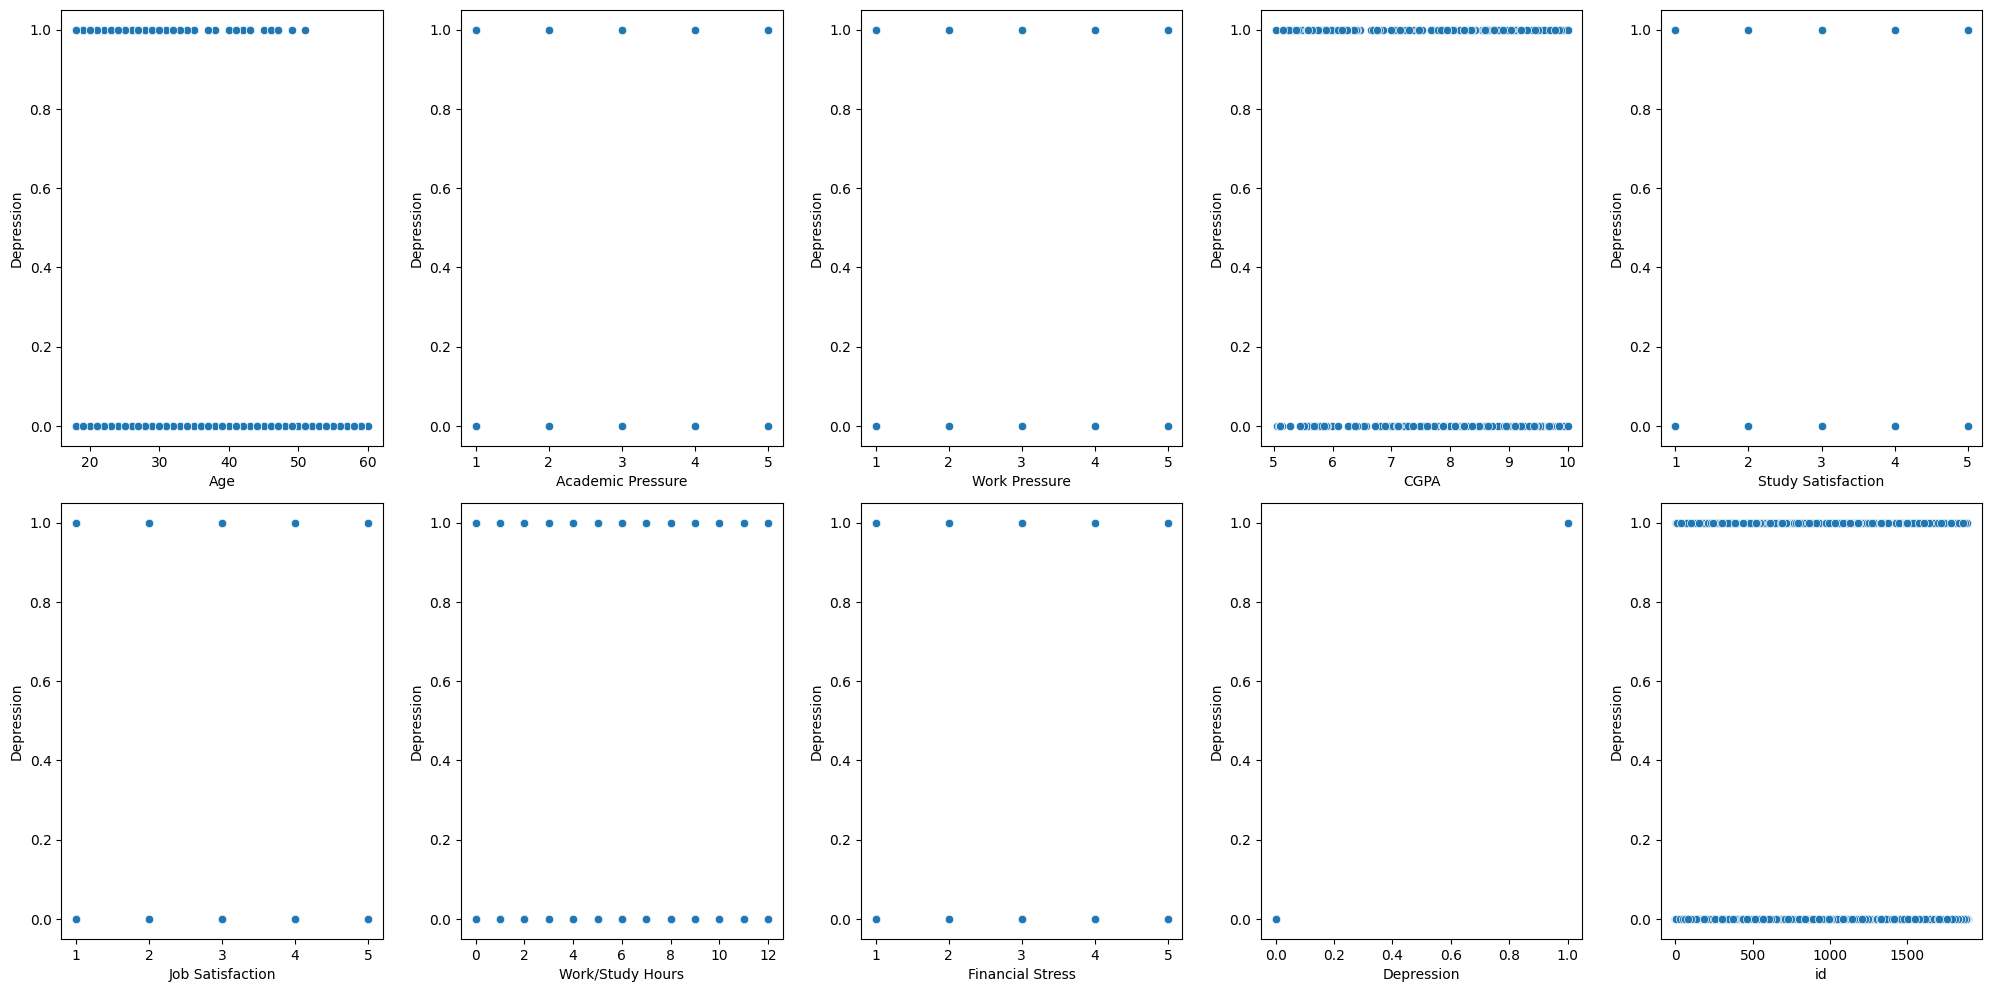

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Depression',
        data=num_df,
        ax=ax,
    )
fig.tight_layout(pad=1.0)

***
_Диаграммы рассеяния оказываются неэффективными, так как по сути практически все признаки являются категориальными (просто представлены они в числовом виде)._
***

<Axes: >

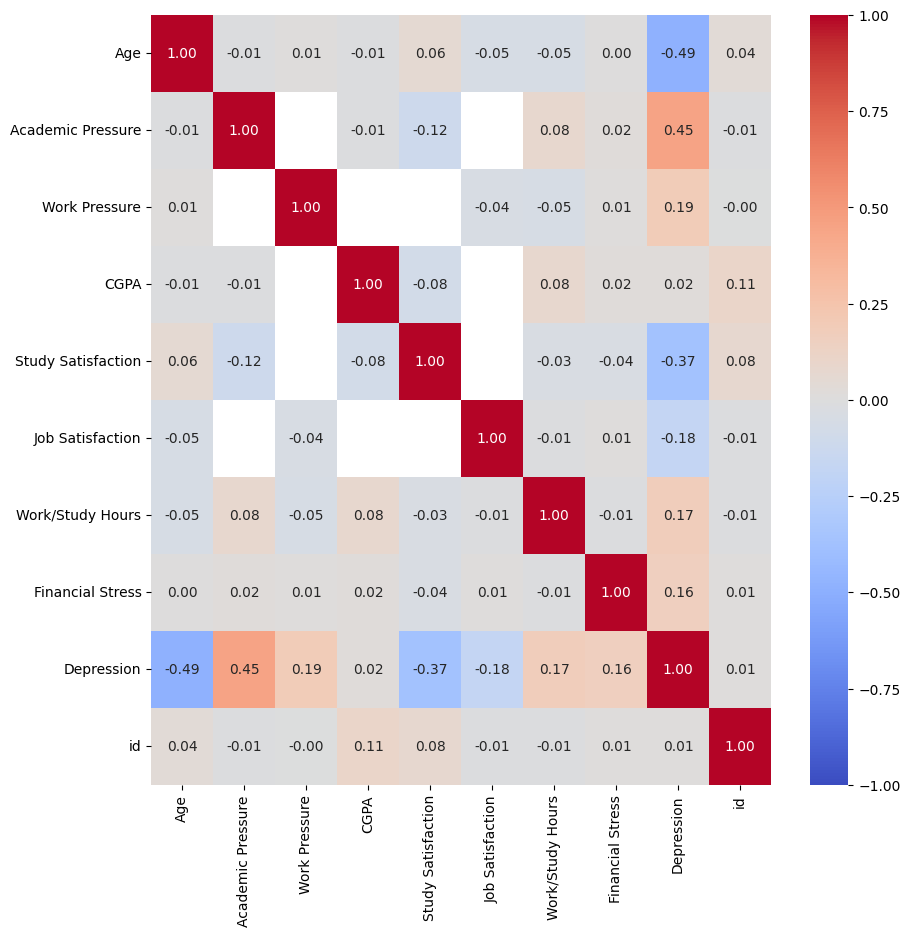

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_df.corr(), fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot=True)

***
_Видим, что признаков с сильной корреляцией нет. Можем разве что отметить достаточное влияние возраста и учебной нагрузки._
***

In [12]:
num_df.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression', 'id'],
      dtype='object')

***
_Воспользуемся hue, чтобы отследить процент людей с депрессией и без в зависимости от значения категориального признака. Сделаем это и для порядковых, и для категориальных признаков._
***

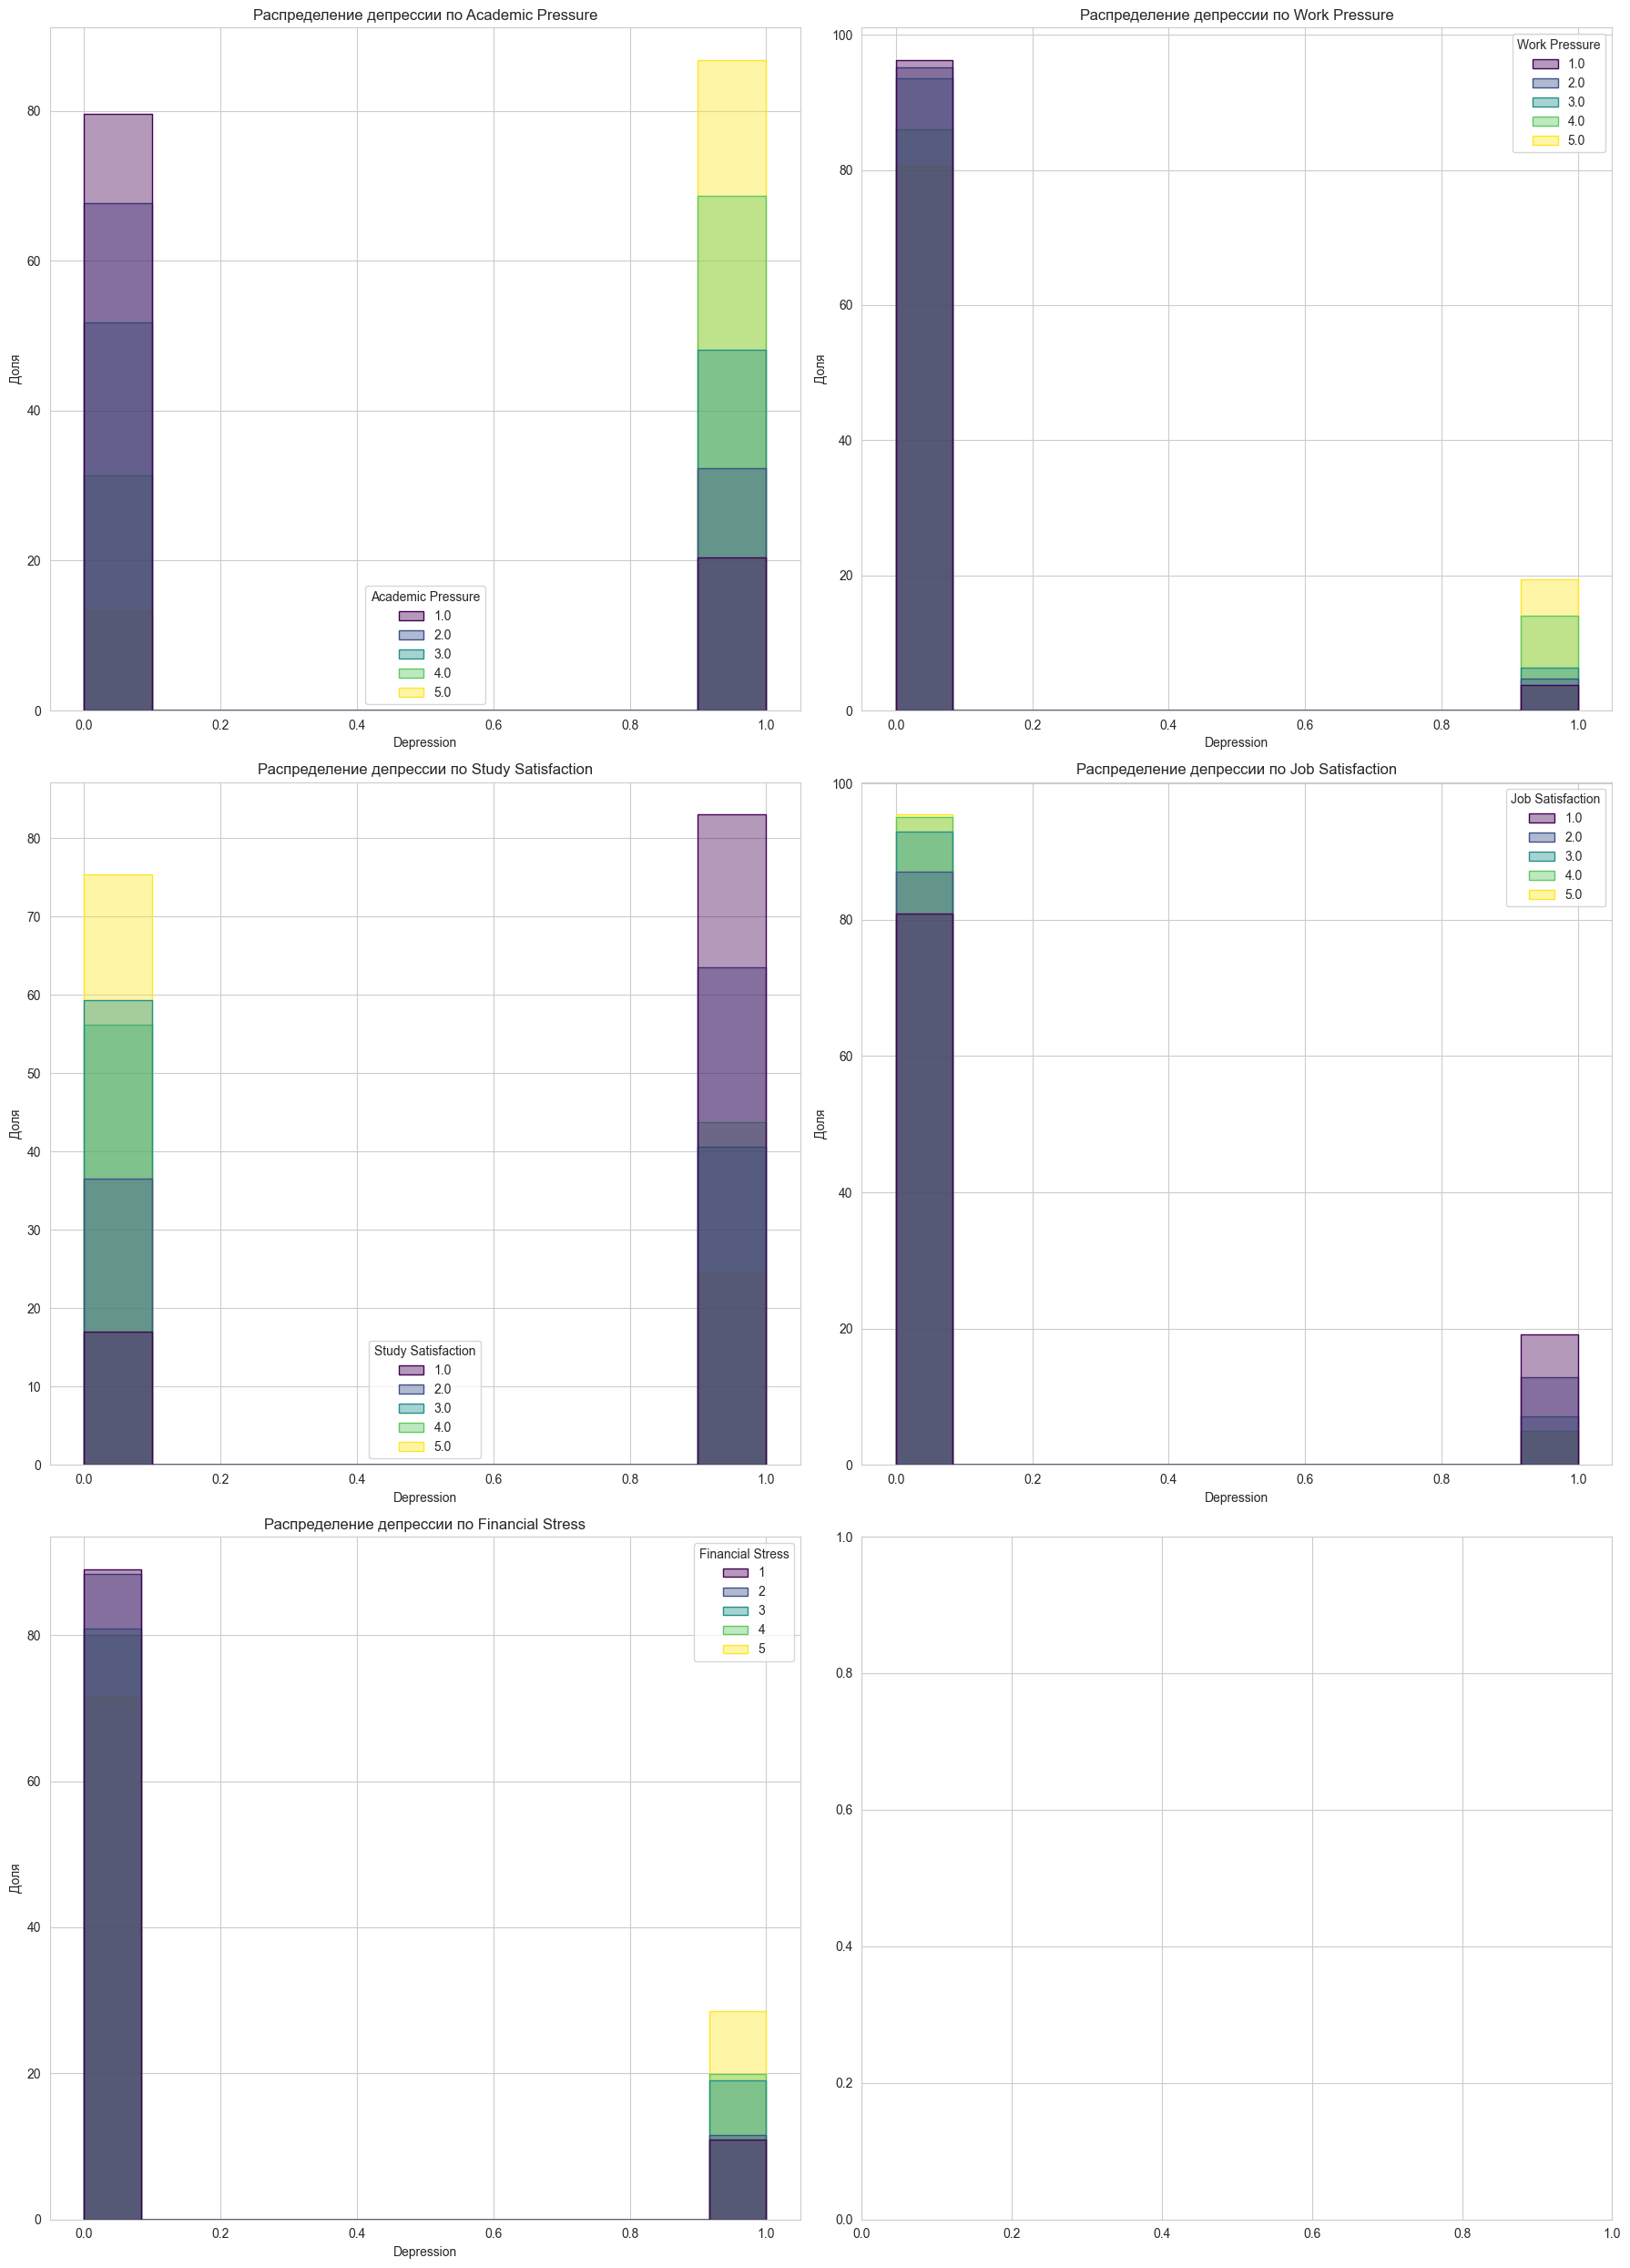

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

top_ordered = [
    'Academic Pressure', 
    'Work Pressure',   
    'Study Satisfaction', 
    'Job Satisfaction',  
    'Financial Stress'
]
fig, axes = plt.subplots(3, 2, figsize=(18, 25))
axes = axes.flatten()

for i, feature in enumerate(top_ordered):
    ax = sns.histplot(
        data=train_df,
        x='Depression',
        hue=feature,
        element='step',
        palette='viridis',
        alpha=0.4,
        stat='percent',
        common_norm=False,
        ax=axes[i]
    )
    ax.set_title(f'Распределение депрессии по {feature}', fontsize=12)
    ax.set_xlabel('Depression', fontsize=10)
    ax.set_ylabel('Доля', fontsize=10)

plt.tight_layout()


In [14]:
cat_df.columns

Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

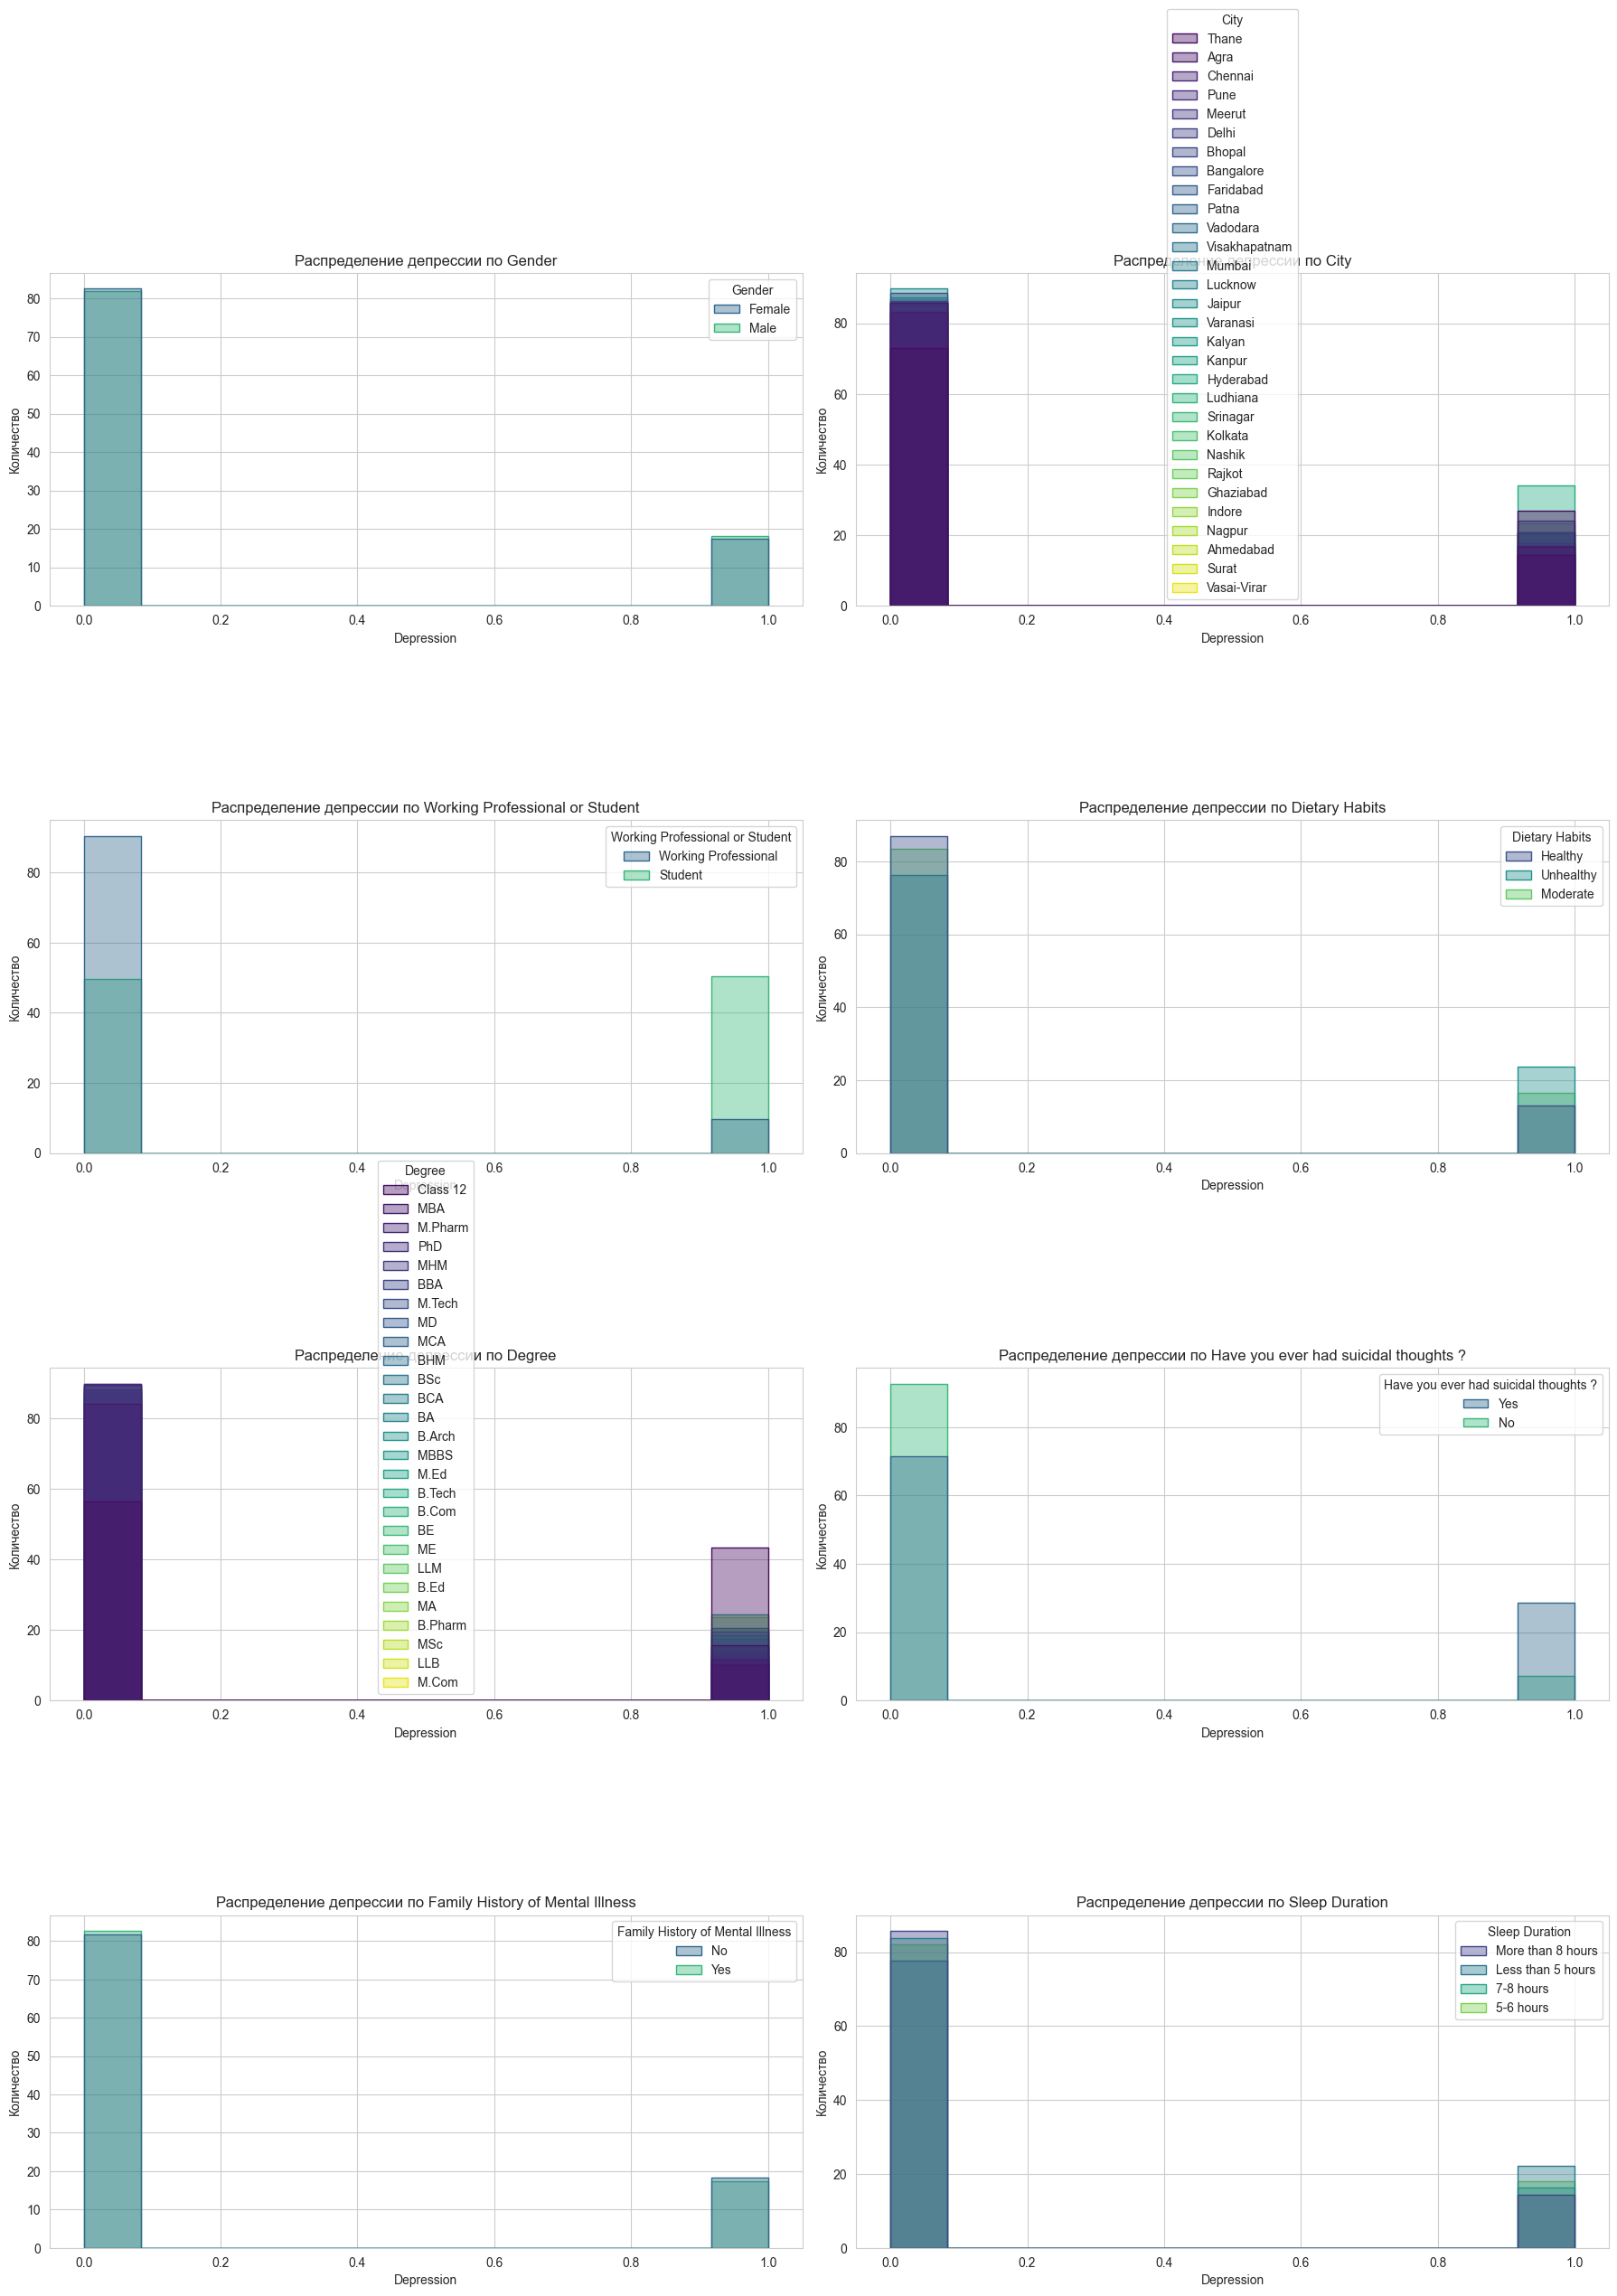

In [15]:
sns.set_style("whitegrid")

top_categorical = [
    'Gender', 
    'City',   
    'Working Professional or Student', 
    'Dietary Habits',  
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
    'Sleep Duration'
]
fig, axes = plt.subplots(4, 2, figsize=(18, 25))
axes = axes.flatten()
for i, feature in enumerate(top_categorical):
    ax = sns.histplot(
        data=train_df,
        x='Depression',
        hue=feature,
        element='step',
        palette='viridis',
        stat='percent',
        common_norm=False,
        alpha=0.4,
        ax=axes[i]
    )
    ax.set_title(f'Распределение депрессии по {feature}', fontsize=12)
    ax.set_xlabel('Depression', fontsize=10)
    ax.set_ylabel('Количество', fontsize=10)
plt.tight_layout()

***
_Все результаты не являются ошеломляющими, до основных зависимостей можно было додуматься и логически (например, чем меньше человек спит, тем скорее у него будет депрессия). Единственное из интересного, что история семейных ментальных болезней практически не влияет на депрессивность индивида (по крайней мере на этой выборке)._
***

In [16]:
nan_df = (train_df.isnull().mean()*100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
8,CGPA,80.092593
9,Study Satisfaction,80.092593
6,Academic Pressure,80.092593
5,Profession,26.719577
10,Job Satisfaction,19.907407
7,Work Pressure,19.907407
1,Gender,0.000000
0,Name,0.000000
3,City,0.000000
2,Age,0.000000


***
_Посмотрим, какие в принципе значения принимает каждый признак:_
***

In [17]:
exclude_cols = ['Age']

cols_to_use = [col for col in df.columns if col not in exclude_cols]

for col in train_df[cols_to_use].columns:
    print(f"Столбец: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)


Столбец: Name
Name
Rohan      19
Krishna    17
Sanya      17
Chhavi     16
Tushar     16
           ..
Lakshay     3
Gaurav      3
Rajveer     3
Rupa        2
Aakash      2
Name: count, Length: 216, dtype: int64
----------------------------------------
Столбец: Gender
Gender
Male      1004
Female     887
Name: count, dtype: int64
----------------------------------------
Столбец: City
City
Srinagar         83
Pune             80
Meerut           78
Mumbai           72
Visakhapatnam    70
Kanpur           67
Indore           66
Chennai          66
Vasai-Virar      65
Patna            65
Bhopal           63
Surat            63
Vadodara         62
Rajkot           62
Hyderabad        62
Ludhiana         62
Kolkata          61
Thane            61
Jaipur           61
Kalyan           60
Bangalore        60
Faridabad        59
Ahmedabad        58
Varanasi         58
Nagpur           56
Delhi            56
Lucknow          56
Nashik           55
Agra             54
Ghaziabad        50
Name: co

## __Препроцессинг данных и обучение базового варианта логистической регрессии (без регуляризаций)__

***
_Так как в eda мы увидели, что численные признаки по сути принимают всего несколько значений и что вряд ли стратегия заполнения модой будет эффективна, то заполним пропуски в данных константным значением 0 (при этом мы не сильно испортим частичный порядок в категориях, NaN заменить на 0 здесь вполне естественно). Скейлинг числовых признакоd не требуется, так как все они принимают значения одного порядка. Категориальные признаки закодируем onehot'ом и посмотрим на результаты логистической регрессии на f1._
***

In [18]:
'''
sleep_map = {'More than 8 hours': 4, '7-8 hours': 3, '5-6 hours': 2, 'Less than 5 hours': 1}
dietary_map = {'Healthy': 3,'Moderate': 2,'Unhealthy': 1}
'''

"\nsleep_map = {'More than 8 hours': 4, '7-8 hours': 3, '5-6 hours': 2, 'Less than 5 hours': 1}\ndietary_map = {'Healthy': 3,'Moderate': 2,'Unhealthy': 1}\n"

In [19]:
'''
train_df['Sleep Duration'] = train_df['Sleep Duration'].map(sleep_map)
val_df['Sleep Duration'] = val_df['Sleep Duration'].map(sleep_map)
test_df['Sleep Duration'] = test_df['Sleep Duration'].map(sleep_map)

train_df['Dietary Habits'] = train_df['Dietary Habits'].map(dietary_map)
val_df['Dietary Habits'] = val_df['Dietary Habits'].map(dietary_map)
test_df['Dietary Habits'] = test_df['Dietary Habits'].map(dietary_map)
'''

"\ntrain_df['Sleep Duration'] = train_df['Sleep Duration'].map(sleep_map)\nval_df['Sleep Duration'] = val_df['Sleep Duration'].map(sleep_map)\ntest_df['Sleep Duration'] = test_df['Sleep Duration'].map(sleep_map)\n\ntrain_df['Dietary Habits'] = train_df['Dietary Habits'].map(dietary_map)\nval_df['Dietary Habits'] = val_df['Dietary Habits'].map(dietary_map)\ntest_df['Dietary Habits'] = test_df['Dietary Habits'].map(dietary_map)\n"

***
_P.S. Попытка закодировать время сна и пищевые привычки с помощью отношений порядка провалилась. Score на f1 ухудшается на две сотые по сравнению с бинарным кодированием. Поэтому эти ячейки закомментированы._
***

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

target_col = 'Depression'

num_features = train_df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col).tolist()
cat_features = train_df.select_dtypes(include=['object', 'category']).columns.drop(target_col, errors='ignore').tolist()

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_val = val_df.drop(columns=[target_col])
y_val = val_df[target_col]

X_test = test_df.drop(columns=[target_col], errors='ignore')

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100000))
])

clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
f1 = f1_score(y_val, val_preds)
f2 = f1_score(y_train, train_preds)
print(f"F1 score on validation: {f1:.4f}")
print(f"F1 score on train: {f2:.4f}")

test_preds = clf.predict(X_test)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Depression': test_preds
})

submission.to_csv('submission.csv', index=False)
print("submission.csv сохранён.")

F1 score on validation: 0.9710
F1 score on train: 1.0000
submission.csv сохранён.


***
_Видим, что модель немного переобучена, поэтому попробуем улучшить результаты с помощью регуляризаций._
***

In [26]:
models = {
    "L2 (Ridge)": {
        "penalty": "l2",
        "solver": "lbfgs",
        "C": 1.0
    },
    "L1 (Lasso)": {
        "penalty": "l1",
        "solver": "liblinear",
        "C": 0.5
    },
    "ElasticNet": {
        "penalty": "elasticnet",
        "solver": "saga",
        "l1_ratio": 0.5,
        "C": 1.0
    }
}

results = []
for name, params in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(
            max_iter=100000,
            **params
        ))
    ])
    
    clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    
    f1_train = f1_score(y_train, train_preds)
    f1_val = f1_score(y_val, val_preds)
    
    results.append({
        "Model": name,
        "F1 Train": f1_train,
        "F1 Val": f1_val,
        "Params": params
    })

print("\n=== Результаты ===")
results_df = pd.DataFrame(results)
print(results_df[["Model", "F1 Train", "F1 Val"]])

best_model_idx = results_df["F1 Val"].idxmax()
best_model_name = results_df.loc[best_model_idx, "Model"]
print(f"\nЛучшая модель: {best_model_name}")

best_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=100000,
        **models[best_model_name]
    ))
])
best_clf.fit(X_train, y_train)
test_preds = best_clf.predict(X_test)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Depression': test_preds
})
submission.to_csv('submission.csv', index=False)
print("\nsubmission.csv сохранён.")


=== Результаты ===
        Model  F1 Train    F1 Val
0  L2 (Ridge)  1.000000  0.971014
1  L1 (Lasso)  0.977444  0.992593
2  ElasticNet  0.735537  0.687500

Лучшая модель: L1 (Lasso)

submission.csv сохранён.


In [28]:
from sklearn.model_selection import GridSearchCV
# Параметры для GridSearch
param_grids = {
    "L2 (Ridge)": {
        'classifier__penalty': ['l2'],
        'classifier__C': np.logspace(-3, 3, 7),  # [0.001, 0.01, ..., 1000]
        'classifier__solver': ['lbfgs']
    },
    "L1 (Lasso)": {
        'classifier__penalty': ['l1'],
        'classifier__C': np.logspace(-3, 3, 7),
        'classifier__solver': ['liblinear']
    }
}

results = []
for name, param_grid in param_grids.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=100000))
    ])
    
    # GridSearch
    gs = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    
    best_clf = gs.best_estimator_
    
    train_preds = best_clf.predict(X_train)
    val_preds = best_clf.predict(X_val)
    
    f1_train = f1_score(y_train, train_preds)
    f1_val = f1_score(y_val, val_preds)
    
    results.append({
        "Model": name,
        "F1 Train": f1_train,
        "F1 Val": f1_val,
        "Best Params": gs.best_params_
    })

print("\n=== Итоговые результаты ===")
results_df = pd.DataFrame(results)
print(results_df[["Model", "F1 Train", "F1 Val"]])

best_model_idx = results_df["F1 Val"].idxmax()
best_model_info = results_df.loc[best_model_idx]
print(f"\nЛучшая модель: {best_model_info['Model']}")
print(f"Параметры: {best_model_info['Best Params']}")

final_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=100000,
        **{k.replace('classifier__', ''): v 
           for k, v in best_model_info['Best Params'].items()}
    ))
])
final_clf.fit(X_train, y_train)

test_preds = final_clf.predict(X_test)
submission = pd.DataFrame({
    'id': test_df['id'],
    'Depression': test_preds
})
submission.to_csv('submission.csv', index=False)
print("\nsubmission.csv сохранён.")


=== Итоговые результаты ===
        Model  F1 Train    F1 Val
0  L2 (Ridge)  1.000000  0.971014
1  L1 (Lasso)  0.986916  1.000000

Лучшая модель: L1 (Lasso)
Параметры: {'classifier__C': np.float64(1.0), 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

submission.csv сохранён.


***
_Таким образом, лучшие результаты показала L1-регуляризация. Она "зануляет" неважные фичи, что в нашем случае является заметным плюсом для задачи классификации на основе небольшого числа признаков (где практически все из них категориальные)._
***